# Modules

In [89]:
import bs4 as bs
import pickle 
import requests
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
import matplotlib.dates as mdates
import datetime as dt
import plotly.graph_objects as go

# Collect Data From Trading View

In [90]:
url = 'https://www.tradingview.com/markets/stocks-usa/market-movers-gainers/'
resp = requests.get(url)
soup = bs.BeautifulSoup(resp.text)
table = soup.find('table', {'tv-data-table tv-screener-table'})

tickers = []
lasts = []
change_percents = []
changes = []
ratings = []
volumes = []
mkt_caps = []
price_earnings = []
eps = []
employees = []
sectors = []
     
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    last = row.findAll('td')[1].text
    change_percent = row.findAll('td')[2].text
    change = row.findAll('td')[3].text
    rating = row.findAll('td')[4].text
    volume = row.findAll('td')[5].text
    mkt_cap = row.findAll('td')[6].text
    price_earning = row.findAll('td')[7].text
    Eps = row.findAll('td')[8].text
    employee = row.findAll('td')[9].text
    sector = row.findAll('td')[10].text
     
    
    
    tickers.append(ticker)
    lasts.append(last)
    change_percents.append(change_percent)
    changes.append(change)
    ratings.append(rating)
    volumes.append(volume)
    mkt_caps.append(mkt_cap)
    price_earnings.append(price_earning)
    eps.append(Eps)
    employees.append(employee)
    sectors.append(sector)

# Remove \n From Ticker Column

In [91]:
stocks = []

for ticker in tickers:
    symbol = ''
    counter = 0
    for letter in ticker[3:]:
        counter+=1
        if letter.isupper():
            symbol += letter
        if counter > 6:
            break
    stocks.append(symbol)

# Business Name Column

In [92]:
business = []

for ticker in tickers:
    name = ''
    for letter in ticker:
        if letter.isupper() or letter==' ':
            name+=letter
    name = name[:-2]
    business.append(name)

# Create DataFrame

In [93]:
trading_view = pd.DataFrame({
    'TICKER':stocks,
    'Name':business,
    'LAST':lasts,
    'CHG%':change_percents,
    'CHG$':changes,
    'RATING':ratings,
    'VOLUME':volumes,
    'MKT CAP':mkt_caps,
    'P/E':price_earnings,
    'EPS':eps,
    'EMPLOYEES':employees,
    'SECTOR':sectors    
})

In [94]:
trading_view['CHG%'] = trading_view['CHG%'].str[:-1]

# String to Float

In [95]:
trading_view[['LAST','CHG%','CHG$']] = trading_view[['LAST','CHG%','CHG$']].astype(float) 

In [96]:
trading_view.head()

,TICKER,Name,LAST,CHG%,CHG$,RATING,VOLUME,MKT CAP,P/E,EPS,EMPLOYEES,SECTOR
0,AHPI,AHPIALLIED HEALTHCARE PRODUCTS INC,2.90,93.33,1.40,Buy,4.611M,11.641M,—,-0.37,181.00,Health Technology
1,NNVC,NNVCNANOVIRICIDES INC,8.45,54.48,2.98,Strong Buy,35.475M,32.566M,—,-2.22,17.00,Health Technology
2,VCNX,VCNXVACCINEX INC,6.89,35.73,1.81,Buy,163.258K,102.475M,—,-2.85,44.00,Health Technology
3,MDIA,MDIAMEDIACO HOLDING INC,5.90,35.32,1.54,Neutral,47.299K,9.833M,—,—,—,Consumer Services
4,SAEX,SAEXSAEXPLORATION HLDGS INC,3.02,32.46,0.74,Buy,5.581M,12.958M,—,-79.85,803.00,Industrial Services


# Save Top 5

In [97]:
top5 = trading_view.head(5)
index = [dt.datetime.now().strftime('%d/%m/%y')]*len(top5)
top5.index = index

top5.to_csv('Top_5.csv',mode='a')

#find by date
#top5[top5.index.str.contains('')]

# Functions to highlight column elements

In [98]:
def color(val):
    """
    Highlights any color that has a percent increase of >= 40%
    """
    color = 'Green' if val >= 40 else None
    return 'background-color: %s' % color

#df = df.sort_values(['LAST'],ascending=True)
#pd.set_option('display.max_rows',# rows)

# Apply Functions

In [99]:
trading_view.style.applymap(color,subset=['CHG%'])

,TICKER,Name,LAST,CHG%,CHG$,RATING,VOLUME,MKT CAP,P/E,EPS,EMPLOYEES,SECTOR
0,AHPI,AHPIALLIED HEALTHCARE PRODUCTS INC,2.9,93.33,1.4,Buy,4.611M,11.641M,—,-0.37,181.00,Health Technology
1,NNVC,NNVCNANOVIRICIDES INC,8.45,54.48,2.98,Strong Buy,35.475M,32.566M,—,-2.22,17.00,Health Technology
2,VCNX,VCNXVACCINEX INC,6.89,35.73,1.81,Buy,163.258K,102.475M,—,-2.85,44.00,Health Technology
3,MDIA,MDIAMEDIACO HOLDING INC,5.9,35.32,1.54,Neutral,47.299K,9.833M,—,—,—,Consumer Services
4,SAEX,SAEXSAEXPLORATION HLDGS INC,3.02,32.46,0.74,Buy,5.581M,12.958M,—,-79.85,803.00,Industrial Services
5,CASA,CASACASA SYSTEMS INC,4.69,29.2,1.06,Buy,6.784M,394.917M,—,-0.09,743.00,Electronic Technology
6,EHTH,EHTHEHEALTH INC,123.26,26.9,26.13,Buy,4.841M,2.847B,331.73,0.37,1079.00,Finance
7,CBB,CBBCINCINNATI BELL INC,13.75,22.22,2.5,Strong Buy,4.957M,693.289M,—,-1.72,4300.00,Communications
8,ERA,ERAERA GROUP INC,10.24,19.21,1.65,Buy,421.985K,217.999M,—,-0.41,693.00,Industrial Services
9,EQ,EQEQUILLIUM INC,5.1,19.16,0.82,Buy,253.267K,88.618M,—,-1.35,11.00,Health Technology


# Data Table

In [100]:
def data(ticker,rows=''):
    
    ticker = ticker.upper()
    
    start = dt.datetime(2000,1,1).strftime(r'%m/%d/%y')
    end = dt.datetime.now().strftime(r'%m/%d/%y')
    
    df = web.DataReader(ticker, 'yahoo', start, end)
    #df['Date'] = df.index
    
    df = df.sort_values(['Date'],ascending=False)
    return df.head()

data('AAPL')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-24,323.329987,317.519989,320.250000,318.309998,36600500.0,318.309998
2020-01-23,319.559998,315.649994,317.920013,319.230011,26118000.0,319.230011
2020-01-22,319.989990,317.309998,318.579987,317.700012,25458100.0,317.700012
2020-01-21,319.019989,316.000000,317.190002,316.570007,27710800.0,316.570007
2020-01-17,318.739990,315.000000,316.269989,318.730011,34454100.0,318.730011


# Regular Plot

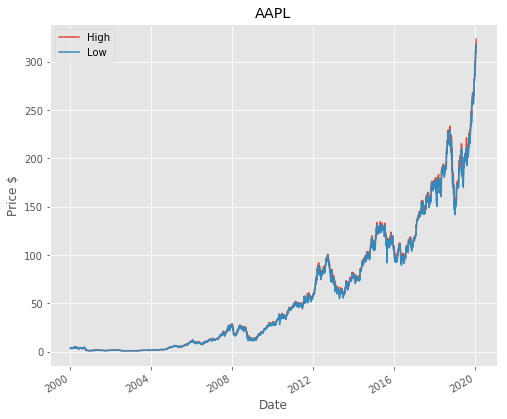

In [116]:
#%matplotlib
style.use('ggplot')

def plot_ticker(ticker):
    start = dt.datetime(2000,1,1).strftime(r'%m/%d/%y')
    end = dt.datetime.now().strftime(r'%m/%d/%y')
    
    ticker = ticker.upper()
    
    df = web.DataReader(ticker, 'yahoo', start, end)
    df['Date'] = df.index
    
    plt.ylabel('Price $')
    plt.title(ticker)
    df['High'].plot(label='High')
    df['Low'].plot(label='Low')
    plt.legend(loc='best')
    plt.show()
    
plot_ticker('AAPL')

# Time Series

In [102]:
#%matplotlib

def time_series(ticker,table=False):
    
    ticker = ticker.upper()
    
    start = dt.datetime(2015,1,1).strftime(r'%m/%d/%y')
    end = dt.datetime.now().strftime(r'%m/%d/%y')
    
    df = web.DataReader(ticker, 'yahoo', start, end)
    df['Date'] = df.index
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Date'],
                             y= df['High'],
                             name = ticker + ' High'
                            ))
    
    fig.add_trace(go.Scatter(x=df['Date'],
                             y= df['Low'],
                             name = ticker + ' Low'
                            ))
    
    fig.update_layout(title_text=ticker + ' Time Series',
                     yaxis_title = ticker + ' Stock($)',
                     xaxis_rangeslider_visible=True,
                     annotations=[{
                          'x':start,
                          'y':0.05,
                          'xref':'x',
                          'yref':'paper',
                          'showarrow':False,
                          'xanchor':'left',
                          'text':'Increase Period Begins'         
                      }])
    
    fig.show()
    
    
    
time_series('AAPL')

# Candlestick

In [103]:
#%matplotlib

def candlestick(ticker):
    
    start = dt.datetime(2000,1,1).strftime(r'%m/%d/%y')
    end = dt.datetime.now().strftime(r'%m/%d/%y')
    
    ticker = ticker.upper()
    
    df = web.DataReader(ticker, 'yahoo', start, end)
    df['Date'] = df.index
    
    fig = go.Figure(data=[
        go.Candlestick(x=df['Date'],
                       open=df['Open'],
                       high=df['High'],
                       low=df['Low'],
                       close=df['Close']
        )
    ])
    
    fig.update_layout(title=ticker + ' Candlestick',
                      yaxis_title = ticker + ' Stock($)',
                      shapes = [{'x0':start,
                                 'x1':end,
                                 'y0':0,
                                 'y1':1,
                                 'xref':'x',
                                 'yref':'paper',
                                 'line_width':2
                          
                      }],
                      annotations=[{
                          'x':start,
                          'y':0.05,
                          'xref':'x',
                          'yref':'paper',
                          'showarrow':False,
                          'xanchor':'left',
                          'text':'Increase Period Begins'         
                      }]
                     )
    fig.show()
    
candlestick('AAPL')

# OHLC

In [104]:
#%matplotlib

def ohlc(ticker):
    
    start = dt.datetime(2000,1,1).strftime(r'%m/%d/%y')
    end = dt.datetime.now().strftime(r'%m/%d/%y')
    
    ticker = ticker.upper()
    
    df = web.DataReader(ticker, 'yahoo', start, end)
    df['Date'] = df.index
    
    fig = go.Figure(data=go.Ohlc(x=df['Date'],
                                 open=df['Open'],
                                 high=df['High'],
                                 low=df['Low'],
                                 close=df['Close']
    ))
    
    fig.update_layout(title=ticker + ' OHLC',
                      yaxis_title = ticker + ' Stock($)',
                      shapes = [{'x0':start,
                                 'x1':end,
                                 'y0':0,
                                 'y1':1,
                                 'xref':'x',
                                 'yref':'paper',
                                 'line_width':2
                          
                      }],
                      annotations=[{
                          'x':start,
                          'y':0.05,
                          'xref':'x',
                          'yref':'paper',
                          'showarrow':False,
                          'xanchor':'left',
                          'text':'Increase Period Begins'         
                      }]
                     )
    
    fig.show()
    
ohlc('AAPL')

# Moving Average

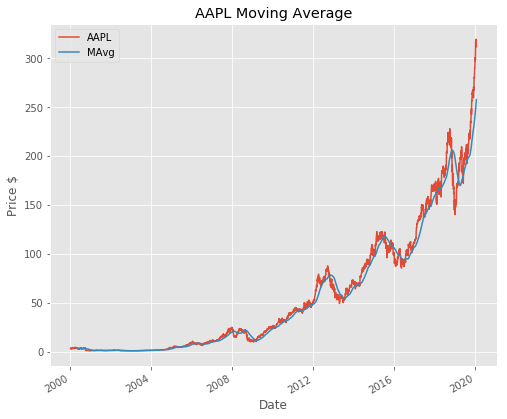

In [105]:
#%matplotlib

def moving_average(ticker):
    '''
    Moving average for any ticker
    '''
    
    ticker = ticker.upper()
    
    start = dt.datetime(2000,1,1).strftime(r'%m/%d/%y')
    end = dt.datetime.now().strftime(r'%m/%d/%y')
    df = web.DataReader(ticker, 'yahoo', start, end)
    #df.tail()
    
    close_px = df['Adj Close']
    mavg = close_px.rolling(window=100).mean()

    
    #Modify size of plot
    mpl.rc('figure', figsize=(8, 7))
    mpl.__version__

    #Style
    style.use('ggplot')

    close_px.plot(label=ticker)
    mavg.plot(label='MAvg')
    plt.title(ticker + ' Moving Average')
    plt.ylabel('Price $')
    plt.legend(loc='best')
    plt.show()
    
moving_average('aapl')

# Returns

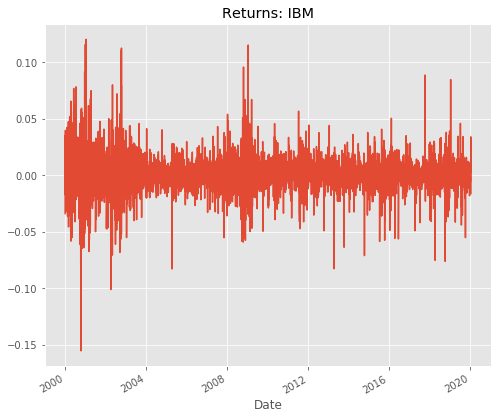

In [106]:
#%matplotlib
def returns(ticker):
    
    ticker = ticker.upper()
    
    start = dt.datetime(2000,1,1).strftime(r'%m/%d/%y')
    end = dt.datetime.now().strftime(r'%m/%d/%y')
    df = web.DataReader(ticker, 'yahoo', start, end)
    #df.tail()
    
    close_px = df['Adj Close']
    returns = close_px / close_px.shift(1) - 1
    returns.plot(label='return')
    plt.title('Returns: ' + ticker)
    plt.show()
    
returns('IBM')

# Other Companies

In [107]:
#Correlate multiple companies with each other

def correlation(*tickers):
    '''
    Any number of valid tickers ie. AAPL, MSFT, etc
    '''
    start = dt.datetime(2000,1,1).strftime(r'%m/%d/%y')
    end = dt.datetime.now().strftime(r'%m/%d/%y')
    
    tickers = list(tickers)
    tickers = [i.upper() for i in tickers]
    
    dfcomp = web.DataReader(tickers,
                        'yahoo',
                        start=start,
                        end=end)['Adj Close']

    retscomp = dfcomp.pct_change()

    corr = retscomp.corr()

    return corr

correlation('AAPL','MSFT','IBM','WMT')

Symbols,AAPL,IBM,MSFT,WMT
Symbols,,,,
AAPL,1.000000,0.401483,0.430576,0.238552
IBM,0.401483,1.000000,0.494058,0.325946
MSFT,0.430576,0.494058,1.000000,0.331345
WMT,0.238552,0.325946,0.331345,1.000000


# Scatter Plot

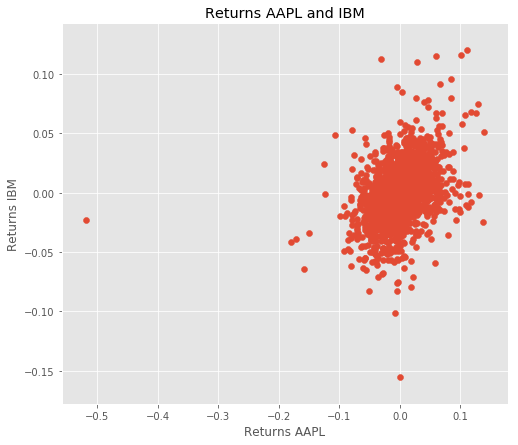

In [108]:
def correlation(x,y):
    '''
    Two of valid tickers ie. AAPL, MSFT, etc
    '''
    start = dt.datetime(2000,1,1).strftime(r'%m/%d/%y')
    end = dt.datetime.now().strftime(r'%m/%d/%y')
    
    x,y = x.upper(), y.upper()
    
    dfcomp = web.DataReader([x,y],
                        'yahoo',
                        start=start,
                        end=end)['Adj Close']

    retscomp = dfcomp.pct_change()
    
    plt.scatter(retscomp[x], retscomp[y])
    plt.title('Returns '+x+' and '+y)
    plt.xlabel('Returns ' + x)
    plt.ylabel('Returns ' + y)
    plt.show()

correlation('AAPL','IBM')

# Scatter Matrix

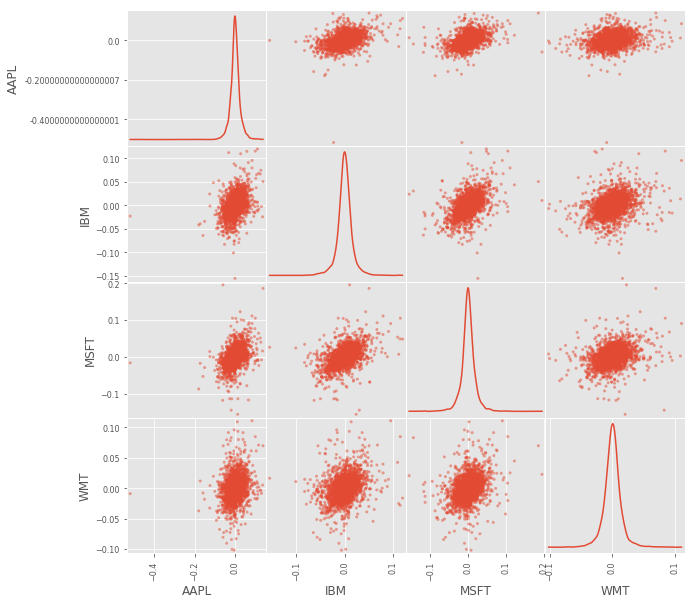

In [109]:
def matrix(*tickers):
    '''
    Any number of valid tickers ie. AAPL, MSFT, etc
    '''
    start = dt.datetime(2000,1,1).strftime(r'%m/%d/%y')
    end = dt.datetime.now().strftime(r'%m/%d/%y')

    tickers = list(tickers)
    tickers = [i.upper() for i in tickers]
    
    dfcomp = web.DataReader(tickers,
                        'yahoo',
                        start=start,
                        end=end)['Adj Close']

    retscomp = dfcomp.pct_change()

    corr = retscomp.corr()
    pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10))
    plt.show()
    
matrix('AAPL','MSFT','IBM','WMT')

# Heat Map

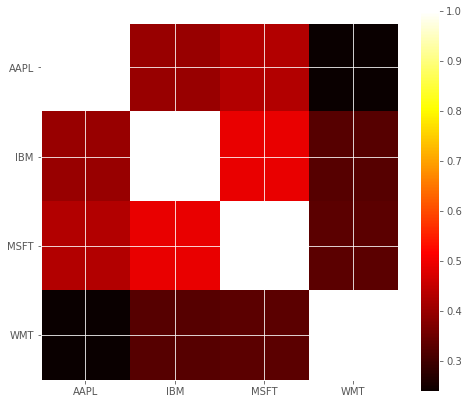

In [110]:
def heat_map(*tickers):
    '''
    Any number of valid tickers ie. AAPL, MSFT, etc
    '''
    start = dt.datetime(2000,1,1).strftime(r'%m/%d/%y')
    end = dt.datetime.now().strftime(r'%m/%d/%y')

    tickers = list(tickers)
    tickers = [i.upper() for i in tickers]
    
    dfcomp = web.DataReader(tickers,
                        'yahoo',
                        start=start,
                        end=end)['Adj Close']

    retscomp = dfcomp.pct_change()

    corr = retscomp.corr()
    plt.imshow(corr, cmap='hot', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns)
    plt.yticks(range(len(corr)), corr.columns)
    plt.show()
    
heat_map('AAPL','MSFT','IBM','WMT')

# Returns Rate and Risk

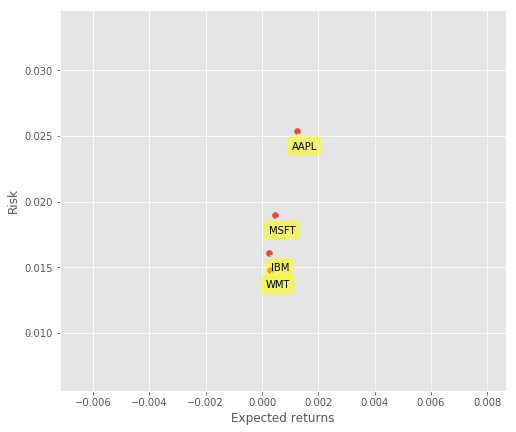

In [118]:
def rate_risk(*tickers):
    '''
    Any number of valid tickers ie. AAPL, MSFT, etc
    '''
    start = dt.datetime(2000,1,1).strftime(r'%m/%d/%y')
    end = dt.datetime.now().strftime(r'%m/%d/%y')

    tickers = list(tickers)
    tickers = [i.upper() for i in tickers]
    
    dfcomp = web.DataReader(tickers,
                        'yahoo',
                        start=start,
                        end=end)['Adj Close']

    retscomp = dfcomp.pct_change()

    plt.scatter(retscomp.mean(), retscomp.std())
    plt.xlabel('Expected returns')
    plt.ylabel('Risk')
    
    for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (20, -20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        
rate_risk('AAPL','MSFT','IBM','WMT')

# Predicting Stock Price

* Simple Linear Analysis
* Quadratic Discriminant Analysis
* K Nearest Neighbor


In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Prediction

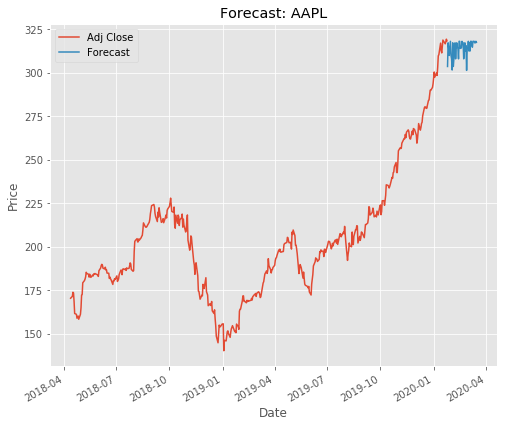

In [119]:
def forecast(ticker):
    start = dt.datetime(2000,1,1).strftime(r'%m/%d/%y')
    end = dt.datetime.now().strftime(r'%m/%d/%y')
    
    ticker = ticker.upper()
    
    df = web.DataReader(ticker, 'yahoo', start, end)
    df['Date'] = df.index
    
    dfreg = df.loc[:,['Adj Close','Volume']]
    dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
    dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
    
    #Pre-processing & Cross Validation
    
    # Drop missing value
    dfreg.fillna(value=-99999, inplace=True)

    # Separate 1 percent of the data to forecast
    forecast_out = int(np.ceil(0.01 * len(dfreg)))

    # Separating the label to predict the AdjClose
    forecast_col = 'Adj Close'
    dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
    X = np.array(dfreg.drop(['label'], 1))

    # Scale the X so that every has the same distribution for linear regression
    X = preprocessing.scale(X)

    # Data Series X and X_train for model generation and evaluation
    X_lately = X[-forecast_out:]
    X = X[:-forecast_out]

    # Separate label and identify as y
    y = np.array(dfreg['label'])
    y = y[:-forecast_out]
    
    X_train,X_test,y_train,y_test = train_test_split(X,y)

    # Linear regression
    clfreg = LinearRegression(n_jobs=-1)
    clfreg.fit(X_train, y_train)

    # Quadratic Regression 2
    clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
    clfpoly2.fit(X_train, y_train)

    # Quadratic Regression 3
    clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
    clfpoly3.fit(X_train, y_train)
    
    # KNN Regression
    clfknn = KNeighborsRegressor(n_neighbors=2)
    clfknn.fit(X_train, y_train)
    
    #Score
    confidencereg = clfreg.score(X_test, y_test)
    confidencepoly2 = clfpoly2.score(X_test,y_test)
    confidencepoly3 = clfpoly3.score(X_test,y_test)
    confidenceknn = clfknn.score(X_test, y_test)
    
    #Prediction
    forecast_set = clfknn.predict(X_lately)
    dfreg['Forecast'] = np.nan
    
    last_date = dfreg.iloc[-1].name
    last_unix = last_date
    next_unix = last_unix + dt.timedelta(days=1)

    for i in forecast_set:
        next_date = next_unix
        next_unix += dt.timedelta(days=1)
        dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
    dfreg['Adj Close'].tail(500).plot()
    dfreg['Forecast'].tail(500).plot()
    plt.title('Forecast: '+ticker)
    plt.legend(loc='best')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()
    
forecast('AAPL')